# Homework 1


### Imports

In [190]:
import sklearn as sk
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.io.arff import loadarff

### Loading the data set 

In [191]:
DATA_DIR = Path('data')
DATA_FILE = 'column_diagnosis.arff'
DATA_PATH = DATA_DIR / DATA_FILE
data = loadarff(DATA_PATH)
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
# Show the first 5 rows
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


# Question 1

In [192]:
X = df.drop('class', axis=1)
y = df['class']
f_statistic, p_values = f_classif(X, y)

f_statistic_df = pd.DataFrame({'feature': X.columns,
                                 'F': f_statistic,
                                    'p-value': p_values})
f_statistic_df.sort_values('p-value')

print(f_statistic_df.sort_values('p-value'))
print("\n")
print(f"Variable with the highest F-statistic and lowest p_value: {f_statistic_df['feature'][f_statistic_df['F'].idxmax()]}\n")
print(f"Variable with the lowest F-statistic and highest p_value: {f_statistic_df['feature'][f_statistic_df['F'].idxmin()]}\n")


                    feature           F       p-value
5  degree_spondylolisthesis  119.122881  5.114732e-39
2     lumbar_lordosis_angle  114.982840  5.357329e-38
0          pelvic_incidence   98.539709  8.752849e-34
3              sacral_slope   89.643953  2.175670e-31
1               pelvic_tilt   21.299194  2.176879e-09
4             pelvic_radius   16.866935  1.121996e-07


Variable with the highest F-statistic and lowest p_value: degree_spondylolisthesis

Variable with the lowest F-statistic and highest p_value: pelvic_radius



# Question 2


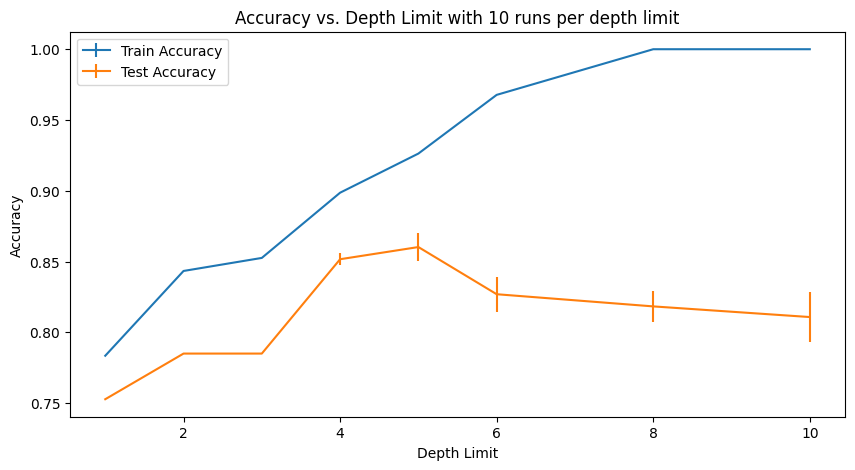

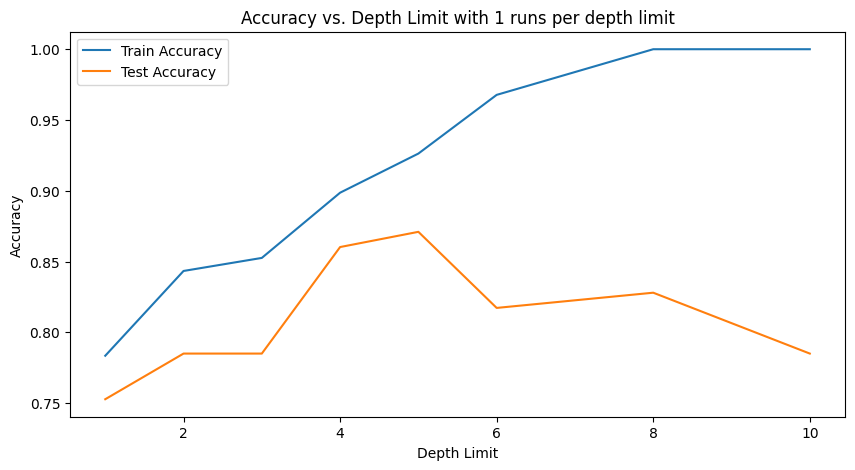

In [193]:
# Load and partition data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=0,
                                                    stratify=y)

# Define the range of depth limits and number of runs to average over
depths = [1, 2, 3, 4, 5, 6, 8, 10]
runs = 10

# Arrays to keep Acc Values
train_acc = np.zeros((runs, len(depths))) # This is going to be a 10x8 array, because we want to keep all the accuracies for each run
test_acc = np.zeros((runs, len(depths)))

# Loop over the runs
for j, depth in enumerate(depths): # Need enumerate since we need to index the depths to keep in arrays
    for i in range(runs):
        # Learn Classifier
        predictor = tree.DecisionTreeClassifier(max_depth=depth)
        predictor.fit(X_train, y_train)

        # Predict on train and test set
        y_predicted_train = predictor.predict(X_train)
        y_predicted_test = predictor.predict(X_test)

        # Compute accuracy
        train_acc[i, j] = sk.metrics.accuracy_score(y_train, y_predicted_train)
        test_acc[i, j] = sk.metrics.accuracy_score(y_test, y_predicted_test)

# Compute mean and standard deviation for train and test accuracies
train_acc_mean = np.mean(train_acc, axis=0)
train_acc_std = np.std(train_acc, axis=0)
test_acc_mean = np.mean(test_acc, axis=0)
test_acc_std = np.std(test_acc, axis=0)

# Plot Optional
plt.figure(figsize=(10, 5))
plt.title('Accuracy vs. Depth Limit with 10 runs per depth limit')
plt.errorbar(depths, train_acc_mean, yerr=train_acc_std, label='Train Accuracy')
plt.errorbar(depths, test_acc_mean, yerr=test_acc_std, label='Test Accuracy')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot the Exercise without Optional Part
plt.figure(figsize=(10, 5))
plt.title('Accuracy vs. Depth Limit with 1 runs per depth limit')
plt.plot(depths, train_acc[0], label='Train Accuracy') # Selecting the first run for each depth limit
plt.plot(depths, test_acc[0], label='Test Accuracy')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Question 3

As seen by both plots, the training accuracy increases as the depth limit of the decision tree increases. However, the testing accuracy increases until a certain depth limit (in this case around 4 or 5) and then starts to decrease. This is because the decision tree is overfitting the training data and is not generalizing well to the testing data.
For the optional part, we can also see that the standard deviation is generally small for the training, indicating that the results are consistent across different random initializations of the data. However, the standard deviation is larger for the testing data, indicating that the testing data is more sensitive to the random initialization of the data.

# Question 4

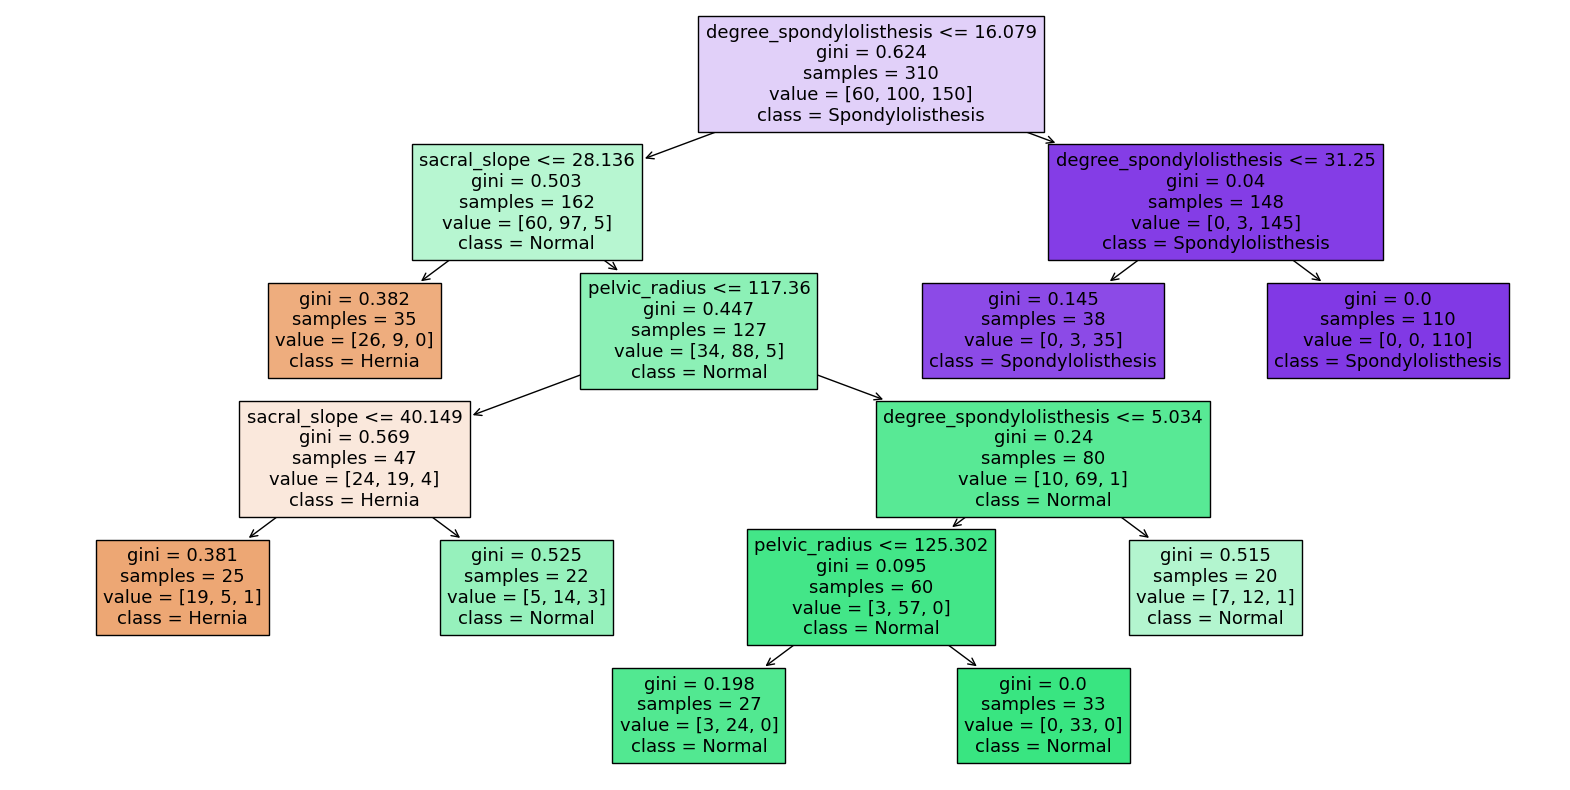

In [194]:
# Learn a decision tree with a minimum number of samples per leaf = 20
predictor = tree.DecisionTreeClassifier(min_samples_leaf=20,
                                        random_state=0)

# Fit all the data
predictor.fit(X, y)

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(predictor,
                feature_names=X.columns,
                filled=True,
                class_names=predictor.classes_)
plt.show()